In [1]:
import muon

In [1]:
%load_ext autoreload
%autoreload 2
from muon import atac as ac
import os
import poisson_atac as patac
import scanpy as sc

Global seed set to 0


In [2]:
5

5

In [4]:
#10X example dataset
data_path = "/lustre/groups/ml01/workspace/laura.martens/neurips_challenge/external_datasets/10k_pbmc_ATACv2_nextgem_Chromium_Controller"

In [5]:
atac = ac.read_10x_h5(os.path.join(data_path, "10k_pbmc_ATACv2_nextgem_Chromium_Controller_filtered_peak_bc_matrix.h5"))

In [6]:
ac.tl.locate_fragments(atac, fragments=os.path.join(data_path, "10k_pbmc_ATACv2_nextgem_Chromium_Controller_fragments.tsv.gz"))

Trying to set attribute `._uns` of view, copying.


In [7]:
atac

AnnData object with n_obs × n_vars = 10246 × 165434
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'files'

Fetching Regions...: 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


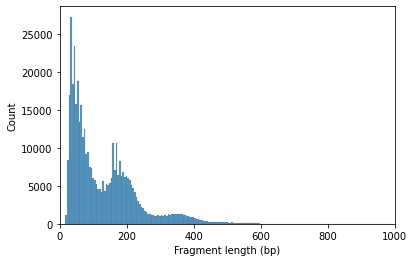

In [8]:
ac.pl.fragment_histogram(atac, region="chr1:1-2000000")

In [9]:
atac.var[['Chromosome', 'Start', 'End']] = atac.var['gene_ids'].str.split(':|-', expand = True)
atac.var = atac.var.astype({'Start': 'int32', 'End': 'int32'})

In [10]:
atac.var

,gene_ids,feature_types,genome,Chromosome,Start,End
chr1:9772-10660,chr1:9772-10660,Peaks,GRCh38,chr1,9772,10660
chr1:180712-181178,chr1:180712-181178,Peaks,GRCh38,chr1,180712,181178
chr1:181200-181607,chr1:181200-181607,Peaks,GRCh38,chr1,181200,181607
chr1:191183-192084,chr1:191183-192084,Peaks,GRCh38,chr1,191183,192084
chr1:267576-268461,chr1:267576-268461,Peaks,GRCh38,chr1,267576,268461
...,...,...,...,...,...,...
KI270713.1:13054-13909,KI270713.1:13054-13909,Peaks,GRCh38,KI270713.1,13054,13909
KI270713.1:15212-15933,KI270713.1:15212-15933,Peaks,GRCh38,KI270713.1,15212,15933
KI270713.1:21459-22358,KI270713.1:21459-22358,Peaks,GRCh38,KI270713.1,21459,22358
KI270713.1:29676-30535,KI270713.1:29676-30535,Peaks,GRCh38,KI270713.1,29676,30535


In [119]:
#count fragments
counts = ac.tl.count_fragments_features(atac, features=atac.var, extend_downstream=0, extend_upstream=0, count_duplicates=False)

100%|██████████| 140726/140726 [05:41<00:00, 411.53it/s]


In [120]:
counts

AnnData object with n_obs × n_vars = 10246 × 140726
    var: 'gene_ids', 'feature_types', 'genome', 'Chromosome', 'Start', 'End'

In [121]:
atac

View of AnnData object with n_obs × n_vars = 10246 × 140726
    var: 'gene_ids', 'feature_types', 'genome', 'Chromosome', 'Start', 'End'
    uns: 'files'
    layers: 'counts'

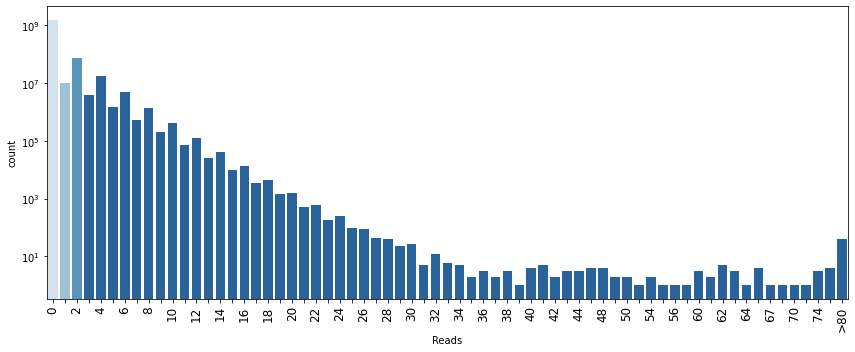

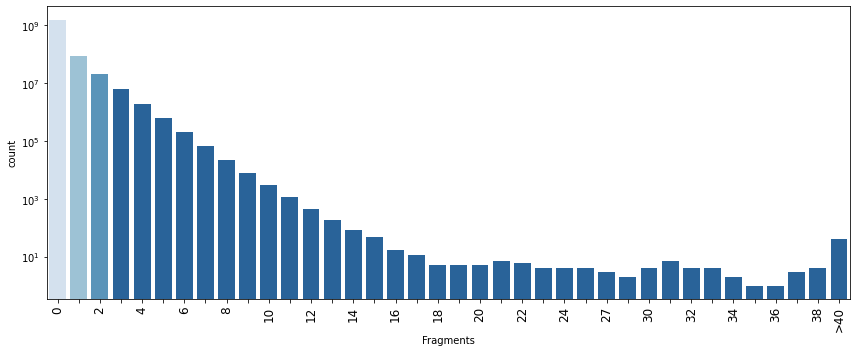

In [41]:
patac.pl.count_distribution(atac, figsize=(12, 5), limit=80)

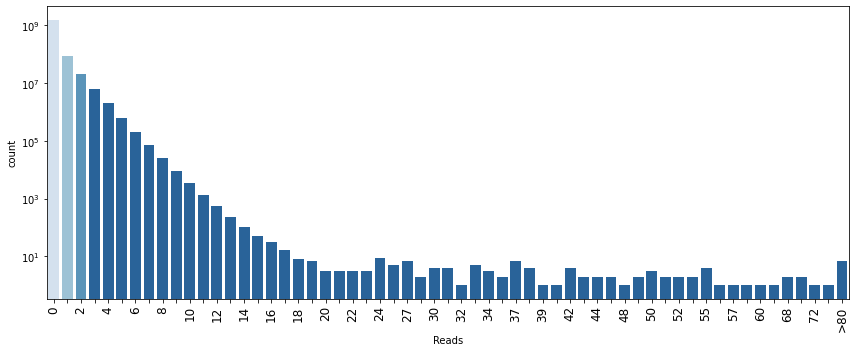

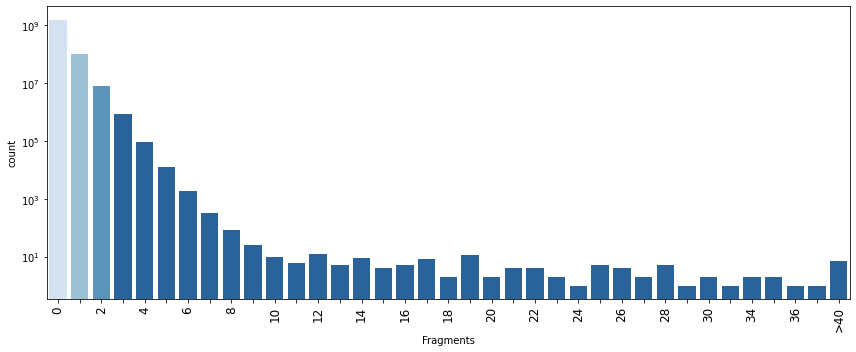

In [42]:
patac.pl.count_distribution(counts, figsize=(12, 5), limit=80)

In [87]:
# since counts.X is a sparse matrix, counts.X.data only gives you positive entries
len(counts.X.data)

115809006

In [88]:
len(atac.X.data)

115807238

In [122]:
atac = patac.data.reads_to_fragments(atac, layer=None, key_added='counts', copy=True)

In [ ]:
# Default for moun is logTF-logIDF
# Default ArchR is log(TFIDF)
# Default Signac is also log(TFIDF)


In [132]:
ac.pp.tfidf(atac, log_tf=False, log_idf=False, log_tfidf=True)

In [134]:
ac.tl.lsi(atac)

In [135]:
atac.obsm['X_lsi'] = atac.obsm['X_lsi'][:,1:]
atac.varm["LSI"] = atac.varm["LSI"][:,1:]
atac.uns["lsi"]["stdev"] = atac.uns["lsi"]["stdev"][1:]

In [138]:
sc.pp.neighbors(atac, use_rep="X_lsi", n_neighbors=10, n_pcs=30)

In [139]:
sc.tl.umap(atac)

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'feature_types' as categorical
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'genome' as categorical
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pan

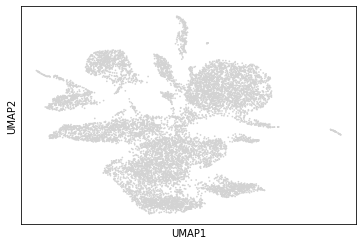

In [140]:
sc.pl.umap(atac)

# Load Neurips dataset

In [3]:
data_path = '/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/data'
adata = patac.data.load_neurips(data_path=data_path, only_train=False, convert_counts = False)

In [4]:
adata

AnnData object with n_obs × n_vars = 62501 × 116490
    obs: 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'cell_type', 'pseudotime_order_ATAC', 'batch', 'pseudotime_order_GEX', 'is_train', 'size_factor'
    var: 'feature_types'
    uns: 'dataset_id', 'gene_activity_var_names', 'organism', 'sample_pm_varnames'
    obsm: 'gene_activity', 'lsi_full', 'lsi_red', 'umap'
    layers: 'counts'

In [5]:
save_path = '/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/benchmark/neurips/'
patac.data.save_for_seurat(adata, save_path, sep=[('-', ':')])

Writing barcodes
Writing peaks
Writing binary matrix
Writing count matrix
Done!


In [157]:
ac.pp.tfidf(adata, log_tf=False, log_idf=False, log_tfidf=True)

In [158]:
ac.tl.lsi(adata)

In [146]:
adata.obsm['X_lsi'] = adata.obsm['X_lsi'][:,1:]
adata.varm["LSI"] = adata.varm["LSI"][:,1:]
adata.uns["lsi"]["stdev"] = adata.uns["lsi"]["stdev"][1:]

In [159]:
if 'X_umap' in adata.obsm.keys():
    adata.obsm.pop('X_umap')
    
if 'umap' in adata.obsm.keys():
    adata.obsm.pop('umap')

if 'neighbors' in adata.uns.keys():
    adata.uns.pop('neighbors')
sc.pp.neighbors(adata, use_rep="X_lsi")

In [160]:
sc.tl.umap(adata)

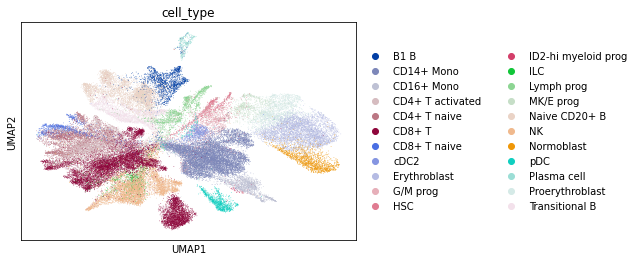

In [161]:
sc.pl.umap(adata, color='cell_type')

# Load hematopoeisis dataset

In [6]:
data_path = '/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/data'
adata = patac.data.load_hematopoiesis(data_path=data_path, convert_counts = False)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [11]:
adata.obs.cell_type

CAAGAAAGTCAAGACG-1                 Pro-B
AATGCCATCGCACAAT-1            Mature-NK2
AAAGGGCAGTACCCAT-1                   cDC
CACAACATCGTGGGTC-1                   MDP
TCCATCGGTTGGTAAA-1         Gamma delta T
                               ...      
160818_BM1137_pDC_LS_70              MDP
160818_BM1137_pDC_LS_35              pDC
160818_BM1137_pDC_LS_81              pDC
160818_BM1137_pDC_LS_17              pDC
160818_BM1137_pDC_LS_85              pDC
Name: cell_type, Length: 63882, dtype: category
Categories (31, object): ['Basophil', 'CLP', 'CMP-BMP', 'Central-memory-CD8-T', ..., 'Pro-B', 'Treg', 'cDC', 'pDC']

In [8]:
save_path = '/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/benchmark/satpathy'

In [9]:
patac.data.save_for_seurat(adata, save_path, sep=[('_', ':'), ('_', '-')])

Writing barcodes
Writing peaks
Writing binary matrix
Writing count matrix
Done!


In [5]:
patac.data

<module 'poisson_atac.data' from '/storage/groups/ml01/code/laura.martens/scatac_poisson/poisson_atac/data/__init__.py'>

In [7]:
?patac.data.save_for_seurat

Signature: patac.data.save_for_seurat(adata, outdir, sep=[('-', ':')])
Docstring: <no docstring>
File:      /storage/groups/ml01/code/laura.martens/scatac_poisson_private/poisson_atac/data/dataloader.py
Type:      function
